In [2]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

Решим задачу классификации на датасете, содержащем различную телеметрическую информацию, собранную автомобилем и смартфоном водителя, а так же 3 категориальных фичи: качество дороги, загруженность траффика и стиль вождения. Будем классифицировать записи по стилю вождения. В качестве метрики будем использовать accuracy.

In [3]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [4]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [5]:
import sys  
#!{sys.executable} -m pip install numpy
#"!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install seaborn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

В датасете ячейки разделяются символом ";", а дробная часть чисел - запятой. Так не пойдёт, заменим разделитель в числах на точку, а у значений - на запятую

In [6]:
inp = open("peugeot_207_01.csv", "r")
file = open("dataset.csv", "w")
while True:
    line = inp.readline()
    if not line:
        break
    line = line.replace(',', '.')
    line = line.replace(';', ',')
    file.write(line)
inp.close()
file.close()
    
    

In [7]:
df = pd.read_csv('dataset.csv')
df.head(5)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,NaN,0.0,NaN,NaN,NaN,0.0418,36.470589,28.0,100.0,802.5,10.30,14.0,0.0118,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,NaN,0.0,NaN,NaN,NaN,0.0713,36.470589,28.0,100.0,802.5,10.30,14.0,-0.0023,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,NaN,0.0,NaN,NaN,NaN,0.0952,36.470589,29.0,100.0,798.5,10.24,14.0,-0.0135,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,NaN,0.0,NaN,NaN,NaN,0.1136,36.470589,29.0,100.0,798.5,10.24,15.0,-0.0161,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,NaN,0.0,NaN,NaN,NaN,0.1274,36.470589,29.0,100.0,804.5,10.36,15.0,-0.0160,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [8]:
df.columns

Index(['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
       'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle'],
      dtype='object')

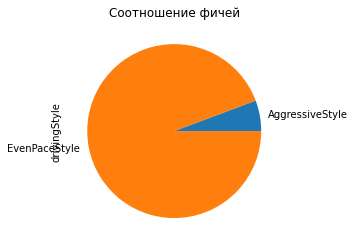

In [9]:
plt.figure()
pd.Series(df['drivingStyle']).value_counts().sort_index().plot(kind = 'pie')
plt.title('Соотношение фичей');

Данные необходимо сбалансировать, модифицируем предыдущий скрипт

In [117]:
import random

random.seed()
inp = open("peugeot_207_01.csv", "r")
file = open("dataset.csv", "w")
while True:
    line = inp.readline()
    if not line:
        break
    line = line.replace(',', '.')
    line = line.replace(';', ',')
    params = line.split(',')
    if params[16] == "AggressiveStyle\n" or params[16] == "drivingStyle\n" or \
    random.randint(1, 16) < 2:
        file.write(line)
inp.close()
file.close()


In [11]:
df = pd.read_csv('dataset.csv')
df.head(5)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-5.199997,0.000000,NaN,NaN,0.000000,1.4109,47.058823,30,101,795.0,7.130000,15,-0.6906,144.853012,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-11.499992,27.900000,NaN,NaN,3.600000,0.8232,18.431374,31,101,1169.0,9.770000,16,-0.3050,40.926338,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-14.199997,32.399998,NaN,NaN,-0.900002,0.7608,2.352941,31,101,1144.0,13.160000,16,-0.3714,31.124100,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,-2.200005,30.599998,12.390000,134.827010,-0.900002,1.5317,63.137257,34,100,1242.0,14.410000,16,-0.3853,22.532818,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,-4.099998,43.199997,23.504999,152.776747,7.199997,1.4017,58.823532,36,114,1838.5,21.299999,20,-0.8586,19.613260,SmoothCondition,LowCongestionCondition,EvenPaceStyle


Text(0.5, 1.0, 'Соотношение фичей')

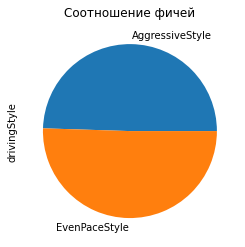

In [12]:

plt.figure()
pd.Series(df['drivingStyle']).value_counts().sort_index().plot(kind = 'pie')
plt.title('Соотношение фичей')

Уже лучше. Продолжим анализ датасета

In [13]:
df.isna().mean()

AltitudeVariation            0.003024
VehicleSpeedInstantaneous    0.000000
VehicleSpeedAverage          0.029234
VehicleSpeedVariance         0.029234
VehicleSpeedVariation        0.003024
LongitudinalAcceleration     0.000000
EngineLoad                   0.000000
EngineCoolantTemperature     0.000000
ManifoldAbsolutePressure     0.000000
EngineRPM                    0.000000
MassAirFlow                  0.000000
IntakeAirTemperature         0.000000
VerticalAcceleration         0.000000
FuelConsumptionAverage       0.004032
roadSurface                  0.000000
traffic                      0.000000
drivingStyle                 0.000000
dtype: float64

Как видим, пробелы в данных есть только у числовых признаков, это несколько упрощает нам дальнейшую обработку

In [14]:
df = df.fillna(df.mean())
df.isna().mean()

AltitudeVariation            0.0
VehicleSpeedInstantaneous    0.0
VehicleSpeedAverage          0.0
VehicleSpeedVariance         0.0
VehicleSpeedVariation        0.0
LongitudinalAcceleration     0.0
EngineLoad                   0.0
EngineCoolantTemperature     0.0
ManifoldAbsolutePressure     0.0
EngineRPM                    0.0
MassAirFlow                  0.0
IntakeAirTemperature         0.0
VerticalAcceleration         0.0
FuelConsumptionAverage       0.0
roadSurface                  0.0
traffic                      0.0
drivingStyle                 0.0
dtype: float64

In [15]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [16]:
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,20,0,587,661,51,585,102,16,2,83,78,8,563,898,1,1,1
1,6,31,587,661,74,305,37,17,2,188,109,9,744,895,1,1,1
2,5,36,587,661,42,283,6,17,2,179,158,9,715,890,1,1,1
3,68,34,90,424,42,643,134,20,1,222,187,9,708,886,1,1,1
4,32,48,238,480,85,581,124,22,15,545,369,13,476,865,1,1,1


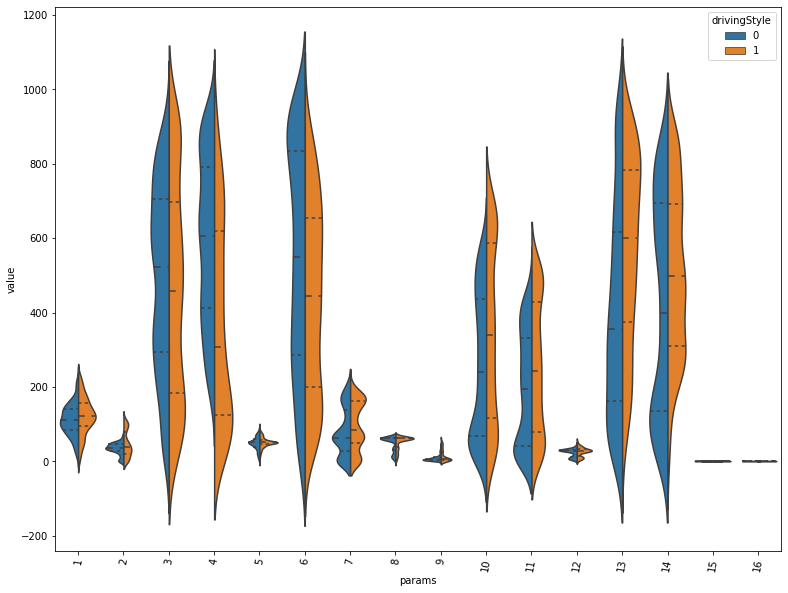

In [17]:
df_div = pd.melt(df, "drivingStyle",
                 df.drop(columns=["drivingStyle"]).columns,
                 var_name="params")
fig, ax = plt.subplots(figsize=(13,10))
p = sns.violinplot(ax = ax, x="params", y="value", hue="drivingStyle", split = True, data=df_div, inner = 'quartile')
df_no_class = df.drop(["drivingStyle"],axis = 1)
p.set_xticklabels(rotation = 80, labels = [int(i) for i in range(1, 17)]);

Как видно из данного графика, данные довольно сильно различаются в масштабировании. При обучении модели стоит провести обучение на данных в текущем состоянии, а также после масштабирования, и сравнить результаты.

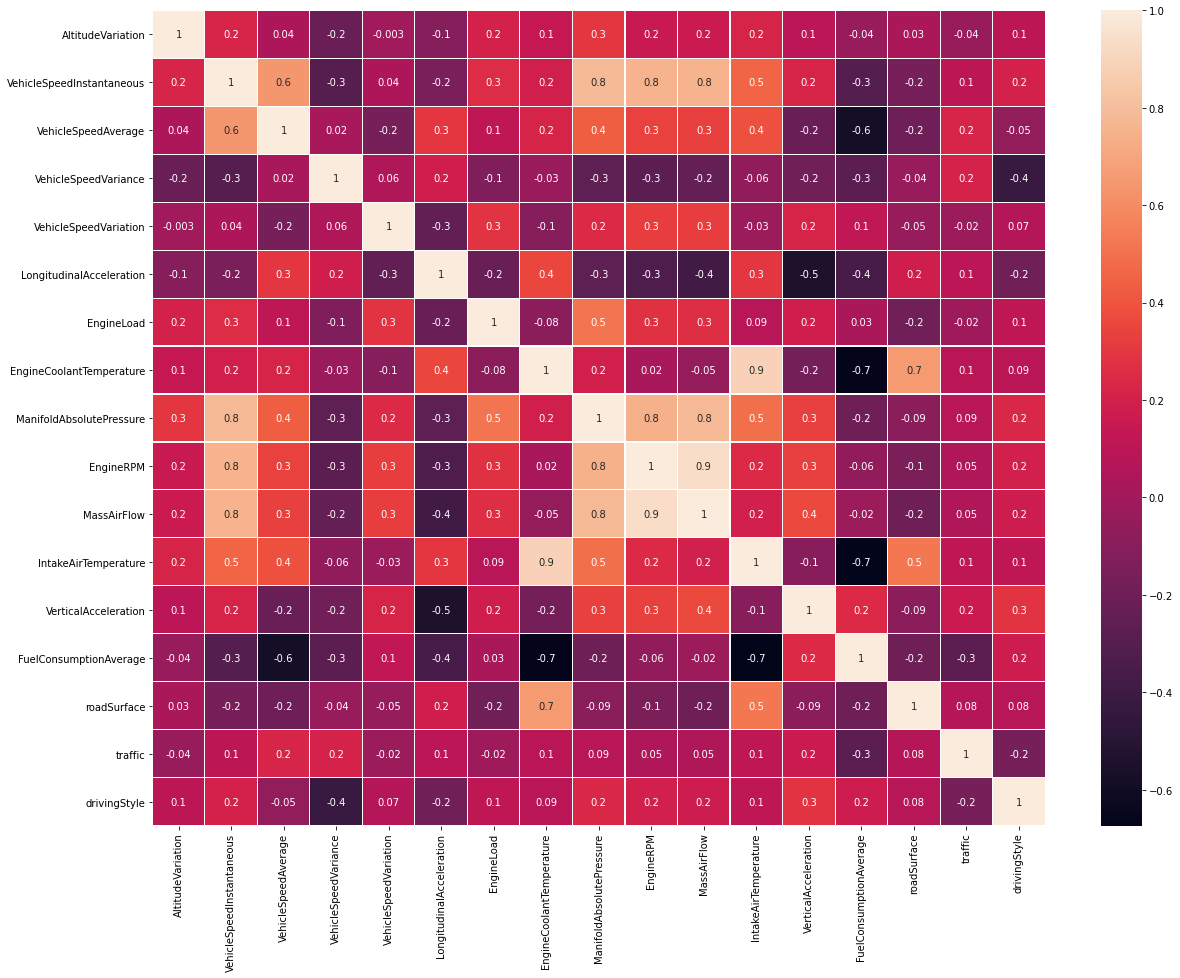

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1, annot=True, fmt='.1g')
plt.yticks(rotation=0);

Как можно видеть по данной матрице корреляций, сильнее всего с целевой фичей коррелирует VehicleSpeedVariance, 
что логично: чем больший разброс скорости, тем вероятно агрессивнее манера вождения. При обучении имеет смысл отбросить эту фичу, чтобы оценить её влияние на обучение модели

In [19]:
X = df.drop(columns=["drivingStyle"])
y = df["drivingStyle"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

Мы решаем задачу классификации, поэтому использовать в качестве метрики
какую-либо функцию ошибки - нерационально. Нам нужно определить, в
каком проценте случаев мы правильно определяем класс, т.е. "точность"
предсказаний, что и показывает метрика accuracy. Классы равнозначны, так что смотреть дополнительно метрики precision и recall
я необходимости не вижу.

In [22]:
def accuracy(y_true, y_pred):
    return np.sum(np.equal(y_true, y_pred)) / len(y_true)

In [23]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [24]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [25]:
class LR():
    def __init__(self, lr=0.01, steps=5000):  # инициализация гиперпараметров
        self.lr = lr
        self.steps = steps

    def s(self, z):    # логистическая функция (сигмоид)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):  # обучение модели
        X = np.hstack((np.ones((X.shape[0], 1)), X))# добавляем ещё один параметр,
                                                    # отвечающий за смещение гиперплоскости
        self.coefs = np.zeros(X.shape[1])  # инициализация коэффициентов модели
        for _ in range(self.steps):        # подбор коэффициентов
            h = self.s(np.dot(X, self.coefs)) # предсказание на текущем шаге
            self.coefs -= self.lr * np.dot(X.T, (h - y)) / y.size # корректировка коэф-тов

    def predict(self, X): # предсказание на основе сформированных коэф-тов
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.s(np.dot(X, self.coefs)).round()

In [26]:
model = LR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy(y_test, y_pred))

/home/anri/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


0.6946308724832215


Как видим, на неотмасштабированных данных у нас всё плохо, точность невысокая, ещё и warning. Далее будем использовать отмасштабированные данные.

In [27]:
%%time
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy(y_test, y_pred))

0.7080536912751678
CPU times: user 7.72 s, sys: 6.26 s, total: 14 s
Wall time: 4.13 s


In [28]:
y_pred = model.predict(X_train_scaled)
print(accuracy(y_train, y_pred))

0.7550432276657061


In [29]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [30]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

In [31]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [33]:
%%time
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy(y_test, y_pred))

0.7114093959731543
CPU times: user 134 ms, sys: 72 ms, total: 206 ms
Wall time: 83.4 ms


Как можно видеть, по метрике accuracy моё решение оказалось довольно близко к sklearn-версии логистической регрессии. Однако, моя модель работает значительно дольше на тех же данных

In [34]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

Попробуем отбросить коррелирующую фичу:

In [35]:
X = df.drop(columns=["drivingStyle"])
y = df["drivingStyle"]
X = X.drop(columns=["VehicleSpeedVariance"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LR()

In [36]:
%%time
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy(y_test, y_pred))

0.6912751677852349
CPU times: user 5.88 s, sys: 4.1 s, total: 9.99 s
Wall time: 2.54 s


In [37]:
model = LogisticRegression()

In [88]:
%%time
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy(y_test, y_pred))

0.6757425742574258
CPU times: user 8.16 s, sys: 6.4 s, total: 14.6 s
Wall time: 4.71 s


Как и следовало ожидать, точность модели упала, но она всё ещё значительно выше 50%